In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet

plt.style.use('bmh')

In [2]:
data = pd.read_csv('../ts_data/example_air_passengers.csv', parse_dates=['ds'])
data 

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


data.plot('ds', 'y', figsize=(12,5))
plt.tight_layout()
plt.show()

In [3]:
# additive

m_add = Prophet(seasonality_mode='additive')
m_add.fit(data)
future = m_add.make_future_dataframe(periods=50, freq='MS')
forecast_add = m_add.predict(future)

# multiplicative

m_mul = Prophet(seasonality_mode='multiplicative')
m_mul.fit(data)
future = m_mul.make_future_dataframe(periods=50, freq='MS')
forecast_mul = m_mul.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        401.66   1.79041e-05       55.4697           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     159         401.8   7.30906e-05       77.6891   1.072e-06       0.001      246  LS failed, Hessian reset 
     181       401.805   1.83883e-05       54.9427   2.747e-07       0.001      307  LS failed, Hessian reset 
     199       401.806   4.36665e-07       56.9097      0.1579           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        401.86   1.34499e-06       66.5975           1           1      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     382       401.861   4.08281e-08       80.1649      0.1685           1      567   
Optimization terminat

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.449     0.0176543       240.422       0.649           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.353    0.00108498       90.0341      0.3062      0.3062      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       503.446   0.000140197        80.679           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       503.467   9.96247e-05       114.472   7.079e-07       0.001      451  LS failed, Hessian reset 
     359       503.486   8.82342e-09       72.6598    0.004982           1      538   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


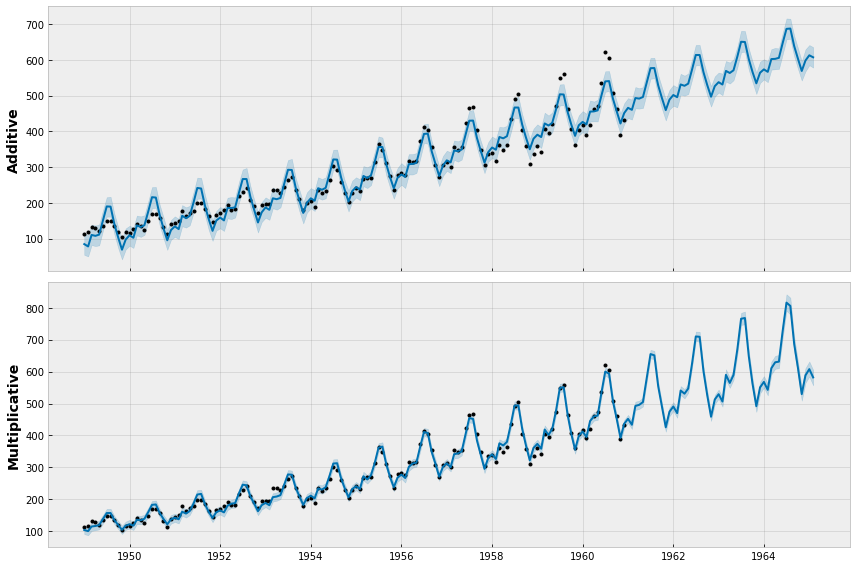

In [4]:
fig, ax = plt.subplots(2,1, figsize=(12,8), sharex=True)

# additive --> constant cycle 
# too large at the beginning
# too small at the end
m_add.plot(forecast_add, ax=ax[0]) 
ax[0].set_ylabel('Additive', fontsize=14, fontweight='bold')
ax[0].set_xlabel('')

# multiplicative --> cycle starts small then getting larger
# better fit the data
m_mul.plot(forecast_mul, ax=ax[1])
ax[1].set_ylabel('Multiplicative', fontsize=14, fontweight='bold')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

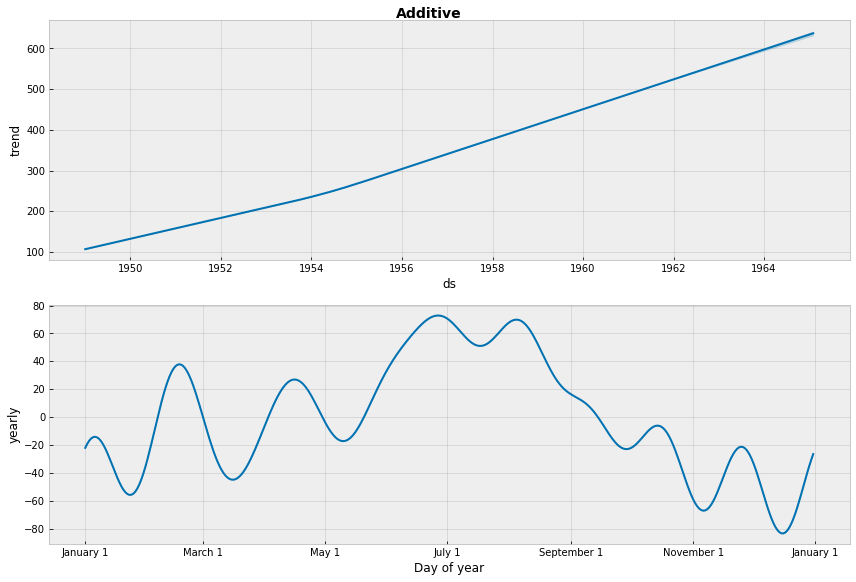

In [5]:
fig = m_add.plot_components(forecast_add, figsize=(12,8))
fig.suptitle('Additive', ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.show()

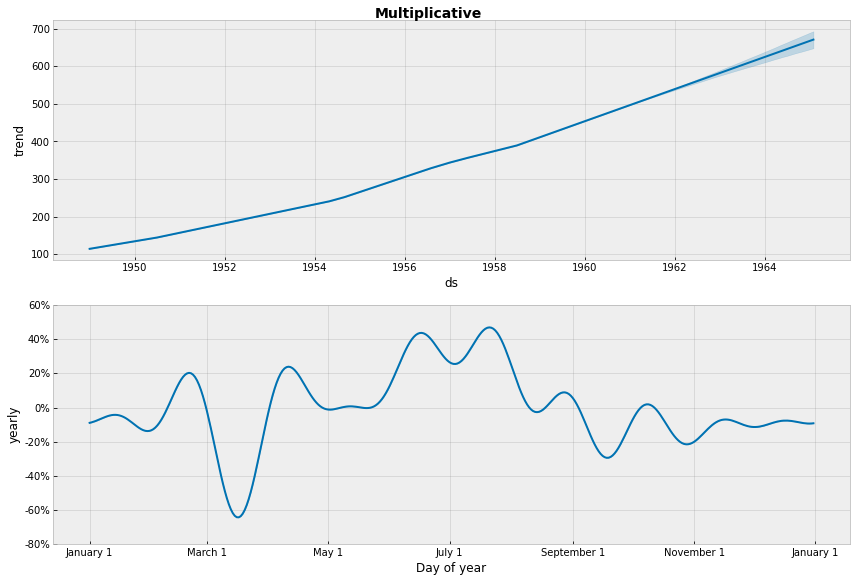

In [6]:
fig = m_mul.plot_components(forecast_mul, figsize=(12,8))
fig.suptitle('Multiplicative', ha='center', va='bottom', fontsize=14, fontweight='bold')
plt.show()